# Importing the Required Libaries and Connecting to Google Drive.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataframe = pd.read_csv('/content/drive/MyDrive/Final Year Project/digital_marketing_campaign_dataset.csv')

In [4]:
dataframe = dataframe.sample(n=2000)

In [5]:
dataframe.tail(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
103,8103,24,Male,113513,Social Media,Awareness,3097.017040,0.292698,0.186775,2,3.796776,13.833407,60,2,4,2,1821,IsConfid,ToolConfid,1
6427,14427,54,Female,63815,SEO,Conversion,9797.161247,0.144650,0.150420,32,6.695756,14.147345,82,14,9,3,2188,IsConfid,ToolConfid,1
7485,15485,21,Female,87562,Email,Awareness,4140.643536,0.136679,0.112280,36,4.205755,11.443559,91,1,7,5,1388,IsConfid,ToolConfid,0
3053,11053,54,Female,129578,Social Media,Conversion,7668.867096,0.148279,0.142937,35,5.595965,11.791030,69,11,4,0,4379,IsConfid,ToolConfid,1
1089,9089,21,Male,69249,PPC,Retention,4966.238518,0.084202,0.187824,40,6.964311,4.298506,94,14,3,3,115,IsConfid,ToolConfid,1
6093,14093,54,Female,35203,SEO,Conversion,2549.855368,0.138923,0.155791,12,9.929153,2.443865,40,18,1,3,4337,IsConfid,ToolConfid,1
2510,10510,41,Male,110298,PPC,Consideration,1133.331595,0.141248,0.041092,7,5.282229,10.359811,30,4,6,4,4041,IsConfid,ToolConfid,1
520,8520,69,Female,41637,PPC,Awareness,5603.159449,0.278748,0.172449,0,5.649953,1.649007,58,12,4,3,677,IsConfid,ToolConfid,1
1155,9155,54,Female,74327,Social Media,Awareness,1753.029988,0.298020,0.055090,17,1.221309,12.741746,86,12,8,1,4609,IsConfid,ToolConfid,1
1785,9785,20,Female,26229,Email,Retention,7201.307003,0.160690,0.014774,36,9.613093,6.603100,46,0,3,4,2252,IsConfid,ToolConfid,1


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 3401 to 1785
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           2000 non-null   int64  
 1   Age                  2000 non-null   int64  
 2   Gender               2000 non-null   object 
 3   Income               2000 non-null   int64  
 4   CampaignChannel      2000 non-null   object 
 5   CampaignType         2000 non-null   object 
 6   AdSpend              2000 non-null   float64
 7   ClickThroughRate     2000 non-null   float64
 8   ConversionRate       2000 non-null   float64
 9   WebsiteVisits        2000 non-null   int64  
 10  PagesPerVisit        2000 non-null   float64
 11  TimeOnSite           2000 non-null   float64
 12  SocialShares         2000 non-null   int64  
 13  EmailOpens           2000 non-null   int64  
 14  EmailClicks          2000 non-null   int64  
 15  PreviousPurchases    2000 non-null   int

In [7]:
dataframe.shape

# specifies number of (data points, features)

(2000, 20)

# Data Cleaning and Preprocessing

### Feature Selection

In [8]:
dataframe.drop(columns=["AdvertisingPlatform", "AdvertisingTool"], axis=1, inplace=True)

### Finding Missing Values

In [9]:
dataframe.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,0
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,0


### Finding the Duplicates

In [10]:
dataframe.duplicated().sum()

np.int64(0)

### Finding Garbage Values

In [11]:
# Garbage values are present in the form of OBJECT DATA TYPE. So we gonna do the identification of Garbage value in Object based Feature.
# Slide up to know about the Data Types of Each Features.

In [12]:
for i in dataframe.select_dtypes(include='object').columns:
  valueCount = dataframe[i].value_counts()
  print(valueCount)

Gender
Female    1226
Male       774
Name: count, dtype: int64
CampaignChannel
Referral        419
SEO             407
PPC             403
Email           401
Social Media    370
Name: count, dtype: int64
CampaignType
Conversion       533
Awareness        524
Consideration    486
Retention        457
Name: count, dtype: int64


# Error Handling

In [13]:
dataframe.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Conversion'],
      dtype='object')

In [14]:
# newdataframe = pd.read_csv('/content/drive/MyDrive/Final Year Project/digital_marketing_campaign_dataset.csv')


# conversionColumn = newdataframe['Conversion']

# dataframe.insert(len(dataframe), 'Conversion', conversionColumn)

# Descriptive Analysis using EDA

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Histogram Plot

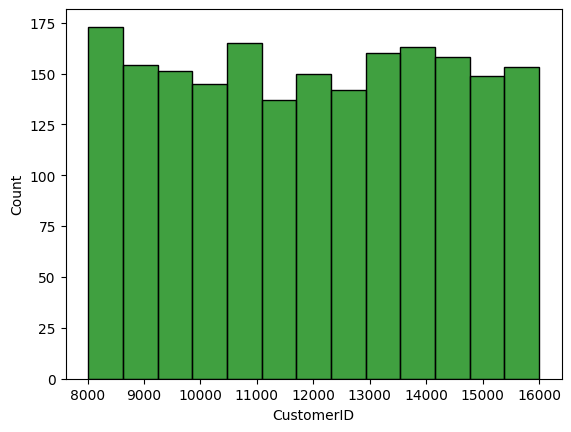

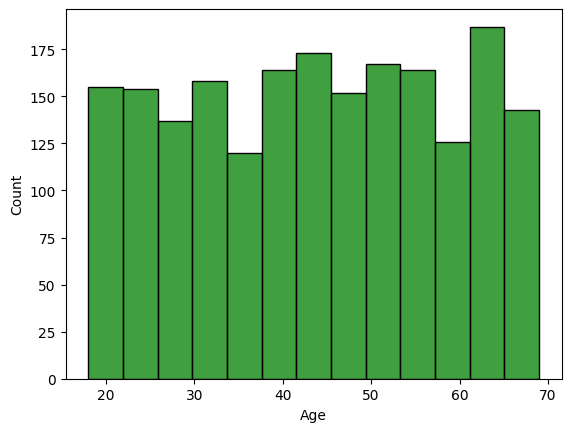

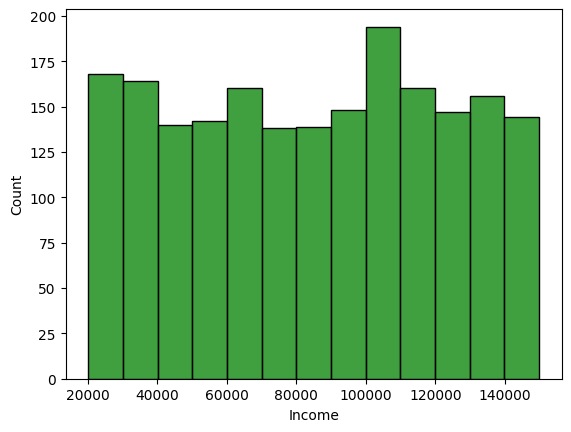

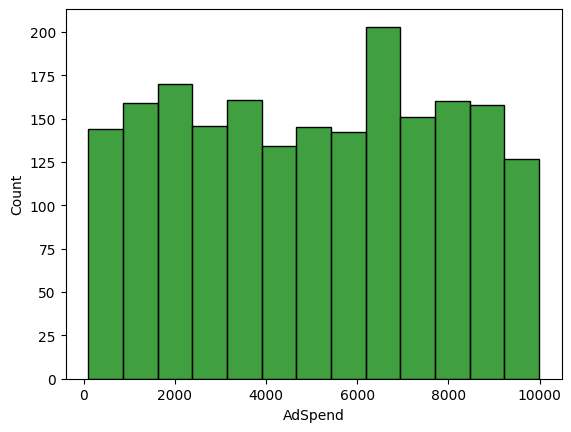

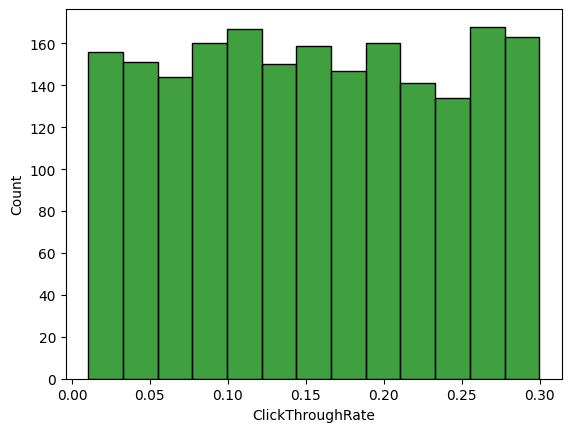

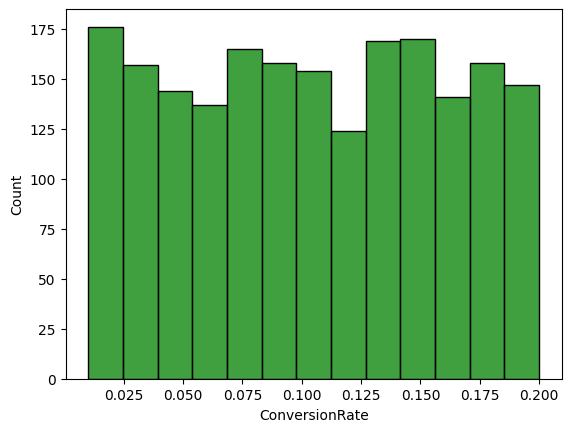

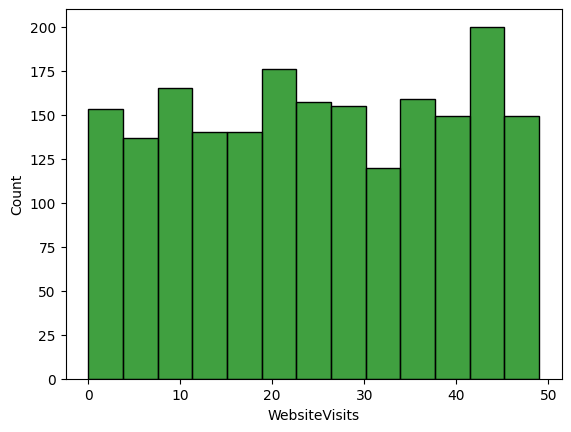

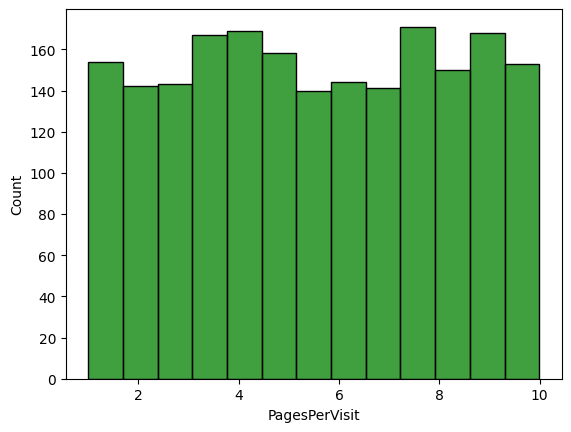

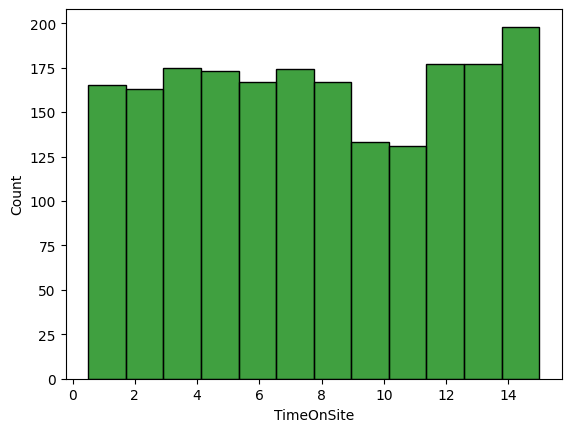

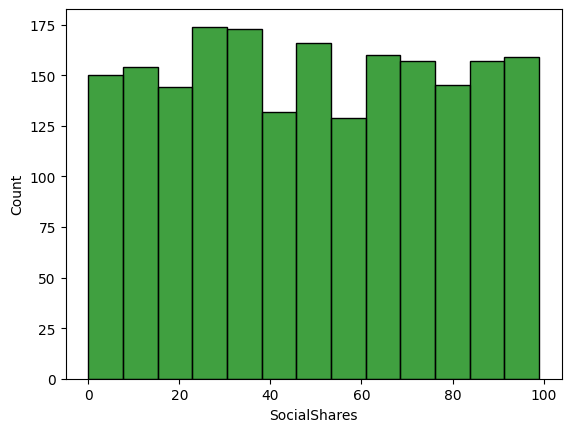

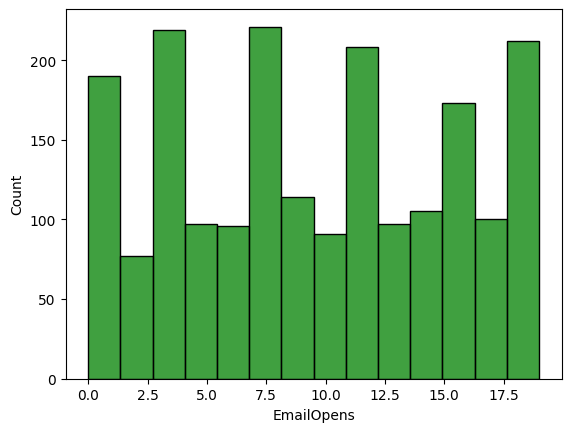

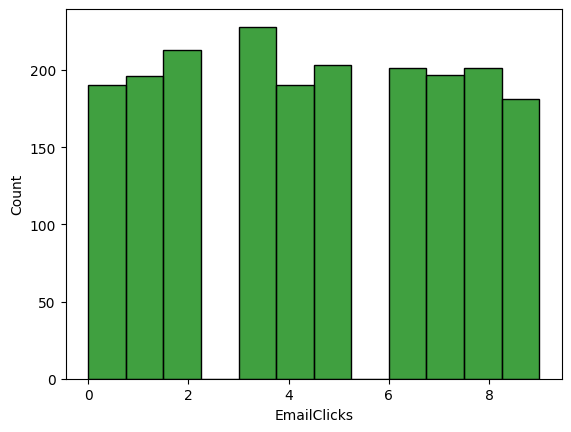

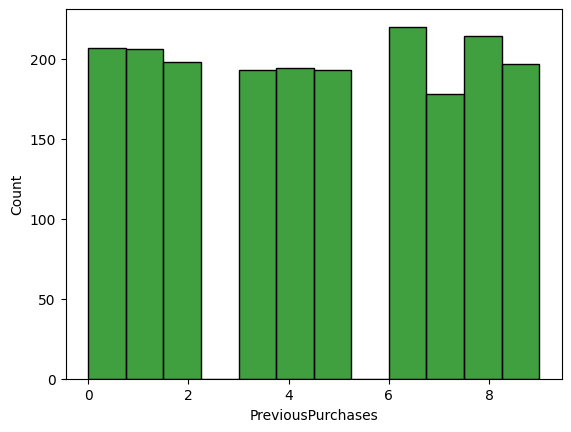

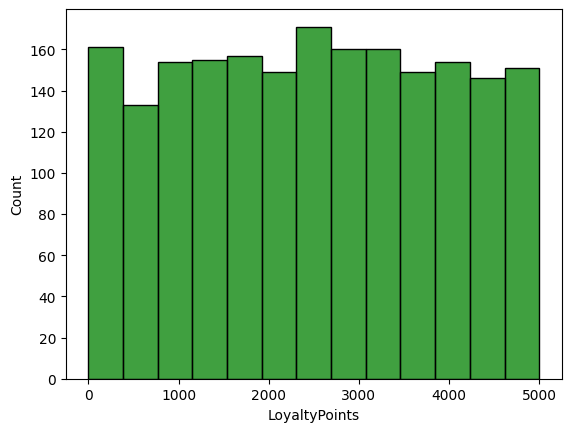

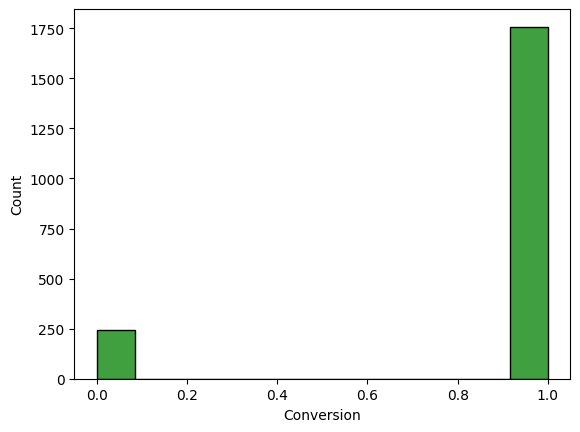

In [16]:
for i in dataframe.select_dtypes(include='number').columns:
  sns.histplot(data=dataframe, x=i, color='green')
  plt.show()

### Scatter Plot

In [17]:
# Used to find the Relationship between the features, like dependent and independent feature.

In [18]:
dataframe.select_dtypes(include='number').columns

Index(['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints', 'Conversion'],
      dtype='object')

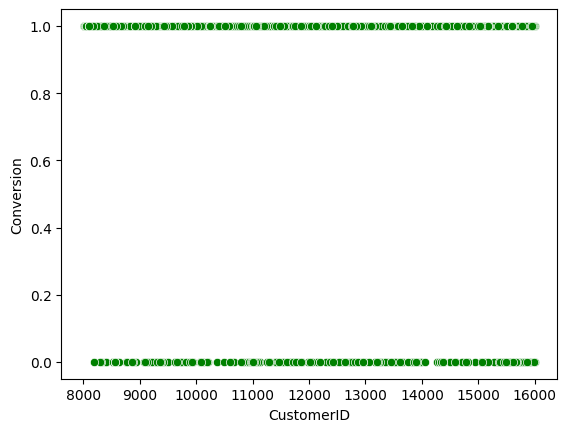

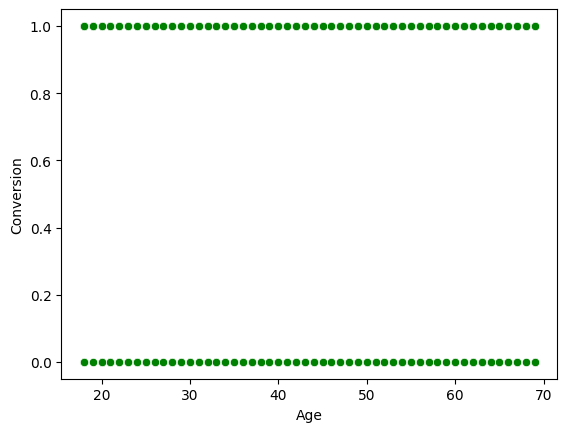

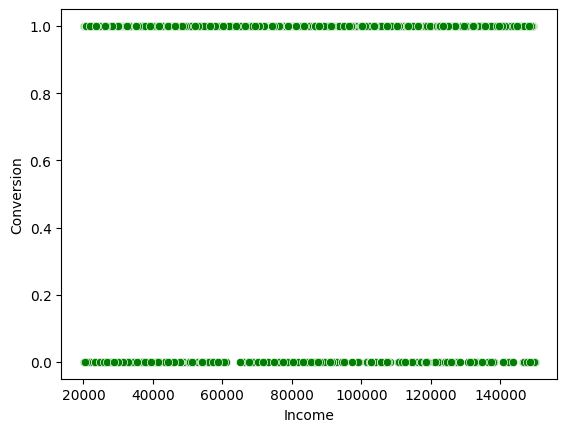

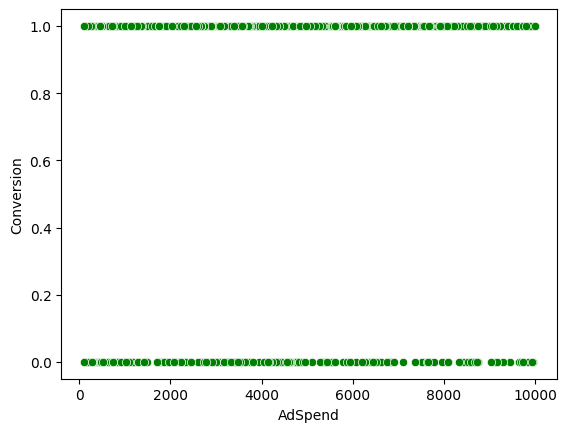

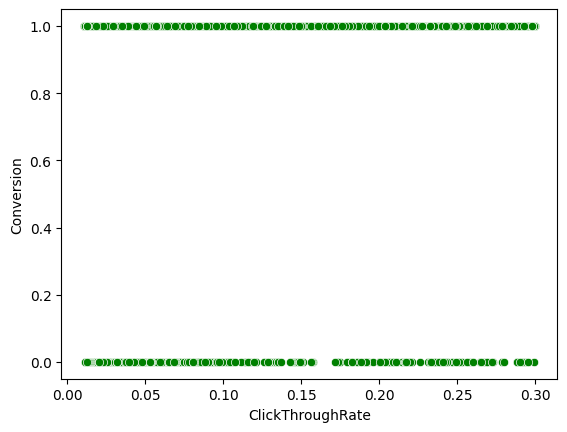

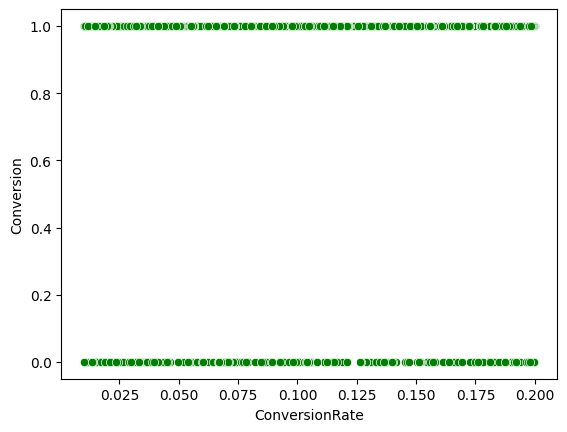

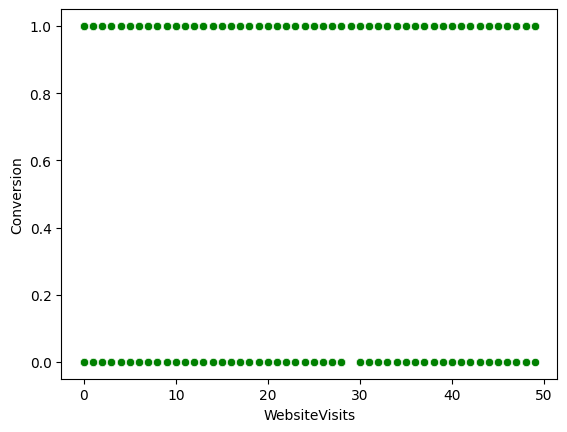

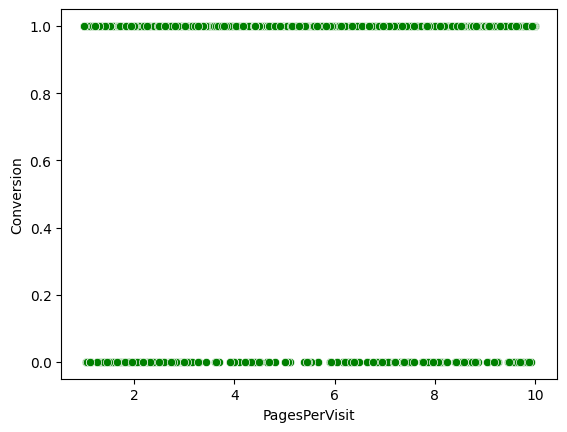

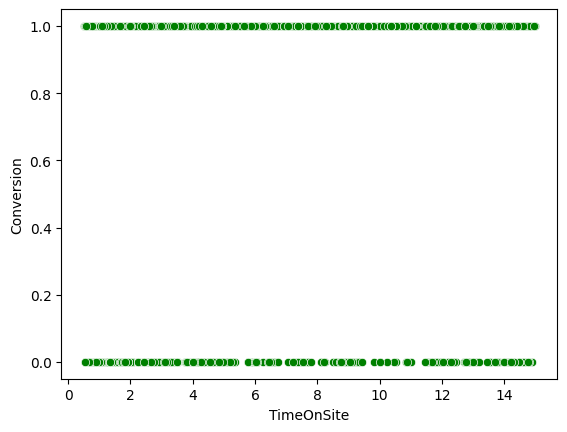

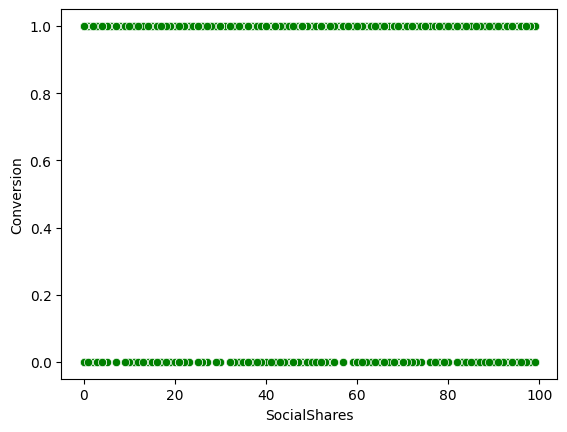

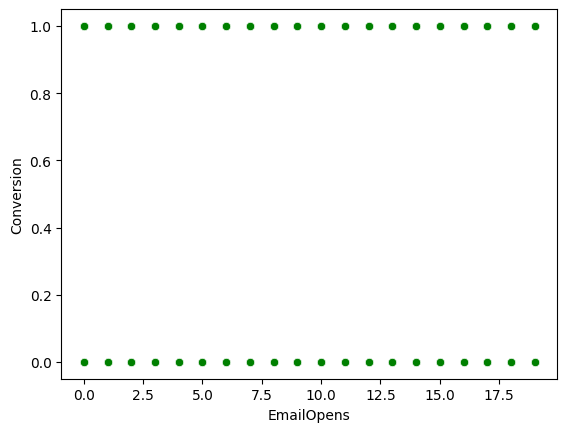

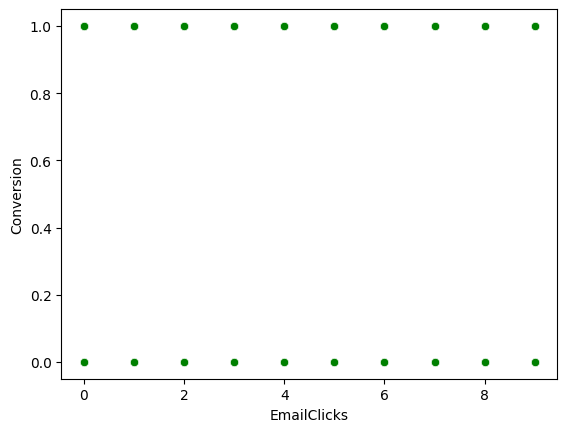

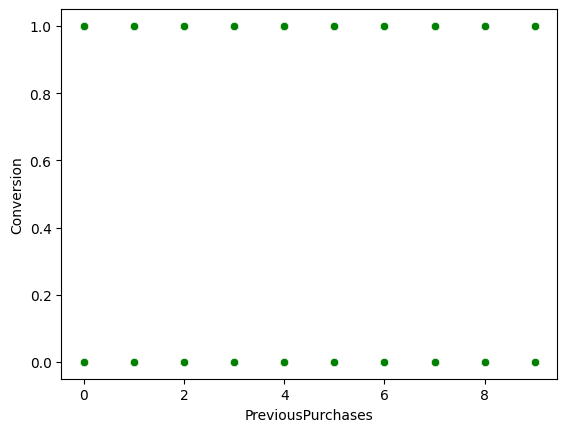

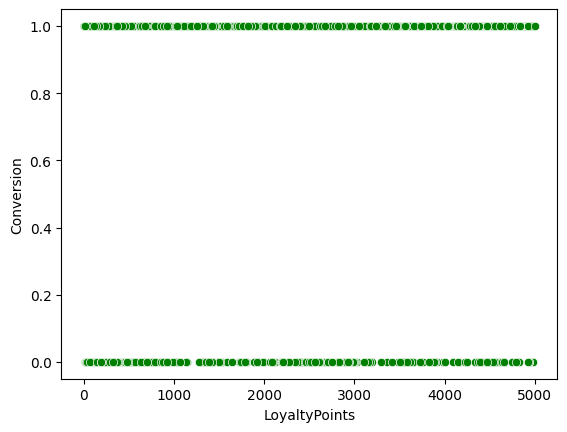

In [19]:
for i in ['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints']:
       sns.scatterplot(data=dataframe, color='green', x=i, y='Conversion')
       plt.show()

# Handling Text based Data

In [20]:
dataframe.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Conversion'],
      dtype='object')

In [21]:
!pip install nltk

## Conversion of CampaignType Feature

### One-Hot Encoding

In [22]:
dataframe['CampaignType'].unique()

array(['Retention', 'Awareness', 'Conversion', 'Consideration'],
      dtype=object)

In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [24]:
ohetransform = ohe.fit_transform(dataframe[['CampaignType']])

In [25]:
ohetransform

,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
3401,0.0,0.0,0.0,1.0
3480,1.0,0.0,0.0,0.0
6139,0.0,0.0,1.0,0.0
4534,0.0,0.0,1.0,0.0
4618,0.0,0.0,1.0,0.0
...,...,...,...,...
6093,0.0,0.0,1.0,0.0
2510,0.0,1.0,0.0,0.0
520,1.0,0.0,0.0,0.0
1155,1.0,0.0,0.0,0.0


### Concatenation of Vectors

In [26]:
dataframe = pd.concat([dataframe, ohetransform], axis=1).drop(columns=['CampaignType'])

In [27]:
dataframe

,CustomerID,Age,Gender,Income,CampaignChannel,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,...,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
3401,11401,37,Female,96970,Referral,9559.753365,0.223897,0.170034,13,5.487323,...,0,16,5,9,1869,1,0.0,0.0,0.0,1.0
3480,11480,43,Male,123603,Email,4147.423104,0.209753,0.108532,23,5.425197,...,28,2,2,3,300,1,1.0,0.0,0.0,0.0
6139,14139,52,Female,36219,SEO,4464.879544,0.255656,0.077228,42,1.778277,...,90,3,7,4,1242,1,0.0,0.0,1.0,0.0
4534,12534,51,Female,128724,Social Media,9478.239938,0.232901,0.154523,6,8.972805,...,18,10,9,5,721,1,0.0,0.0,1.0,0.0
4618,12618,18,Female,88380,SEO,1034.190411,0.248078,0.198381,37,7.318939,...,5,16,8,7,102,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,14093,54,Female,35203,SEO,2549.855368,0.138923,0.155791,12,9.929153,...,40,18,1,3,4337,1,0.0,0.0,1.0,0.0
2510,10510,41,Male,110298,PPC,1133.331595,0.141248,0.041092,7,5.282229,...,30,4,6,4,4041,1,0.0,1.0,0.0,0.0
520,8520,69,Female,41637,PPC,5603.159449,0.278748,0.172449,0,5.649953,...,58,12,4,3,677,1,1.0,0.0,0.0,0.0
1155,9155,54,Female,74327,Social Media,1753.029988,0.298020,0.055090,17,1.221309,...,86,12,8,1,4609,1,1.0,0.0,0.0,0.0


## Conversion of CampaignChannel Feature

In [28]:
dataframe['CampaignChannel'].unique()

array(['Referral', 'Email', 'SEO', 'Social Media', 'PPC'], dtype=object)

### One Hot Encoding

In [29]:
ohetransform = ohe.fit_transform(dataframe[['CampaignChannel']])

In [30]:
ohetransform

,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media
3401,0.0,0.0,1.0,0.0,0.0
3480,1.0,0.0,0.0,0.0,0.0
6139,0.0,0.0,0.0,1.0,0.0
4534,0.0,0.0,0.0,0.0,1.0
4618,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
6093,0.0,0.0,0.0,1.0,0.0
2510,0.0,1.0,0.0,0.0,0.0
520,0.0,1.0,0.0,0.0,0.0
1155,0.0,0.0,0.0,0.0,1.0


### Concatenation of Vectors

In [31]:
dataframe = pd.concat([dataframe, ohetransform], axis=1).drop(columns=['CampaignChannel'])

In [32]:
dataframe

,CustomerID,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,...,Conversion,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media
3401,11401,37,Female,96970,9559.753365,0.223897,0.170034,13,5.487323,9.397420,...,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3480,11480,43,Male,123603,4147.423104,0.209753,0.108532,23,5.425197,12.012075,...,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6139,14139,52,Female,36219,4464.879544,0.255656,0.077228,42,1.778277,2.372643,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4534,12534,51,Female,128724,9478.239938,0.232901,0.154523,6,8.972805,12.688697,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4618,12618,18,Female,88380,1034.190411,0.248078,0.198381,37,7.318939,10.459312,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,14093,54,Female,35203,2549.855368,0.138923,0.155791,12,9.929153,2.443865,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2510,10510,41,Male,110298,1133.331595,0.141248,0.041092,7,5.282229,10.359811,...,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
520,8520,69,Female,41637,5603.159449,0.278748,0.172449,0,5.649953,1.649007,...,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1155,9155,54,Female,74327,1753.029988,0.298020,0.055090,17,1.221309,12.741746,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Conversion of Gender Feature

In [33]:
dataframe['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### One Hot Encoding

In [34]:
ohetransform = ohe.fit_transform(dataframe[['Gender']])

In [35]:
ohetransform

,Gender_Female,Gender_Male
3401,1.0,0.0
3480,0.0,1.0
6139,1.0,0.0
4534,1.0,0.0
4618,1.0,0.0
...,...,...
6093,1.0,0.0
2510,0.0,1.0
520,1.0,0.0
1155,1.0,0.0


### Conversion of Vectors

In [36]:
dataframe = pd.concat([dataframe, ohetransform], axis=1).drop(columns = ['Gender'])

In [37]:
dataframe

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,Gender_Female,Gender_Male
3401,11401,37,96970,9559.753365,0.223897,0.170034,13,5.487323,9.397420,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3480,11480,43,123603,4147.423104,0.209753,0.108532,23,5.425197,12.012075,28,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6139,14139,52,36219,4464.879544,0.255656,0.077228,42,1.778277,2.372643,90,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4534,12534,51,128724,9478.239938,0.232901,0.154523,6,8.972805,12.688697,18,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4618,12618,18,88380,1034.190411,0.248078,0.198381,37,7.318939,10.459312,5,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,14093,54,35203,2549.855368,0.138923,0.155791,12,9.929153,2.443865,40,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2510,10510,41,110298,1133.331595,0.141248,0.041092,7,5.282229,10.359811,30,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
520,8520,69,41637,5603.159449,0.278748,0.172449,0,5.649953,1.649007,58,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1155,9155,54,74327,1753.029988,0.298020,0.055090,17,1.221309,12.741746,86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Finalizing the DataSet for Model Development

In [38]:
dataframe.head()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,Gender_Female,Gender_Male
3401,11401,37,96970,9559.753365,0.223897,0.170034,13,5.487323,9.397420,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3480,11480,43,123603,4147.423104,0.209753,0.108532,23,5.425197,12.012075,28,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6139,14139,52,36219,4464.879544,0.255656,0.077228,42,1.778277,2.372643,90,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4534,12534,51,128724,9478.239938,0.232901,0.154523,6,8.972805,12.688697,18,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4618,12618,18,88380,1034.190411,0.248078,0.198381,37,7.318939,10.459312,5,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [39]:
#The Dataset is completed it Data Preprocessing and Conversion of Vectors and now its suitable to work with the ML Algorithms.
# If the Model's accuracy is not that much good with ML Algorithms, then use DL Algorithms to make this Model to attain it's fullest potential


# Implementation of Deep Learning Algorithms

##Implementation of Recurrent Neural Networks

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


independent = dataframe.loc[:, dataframe.columns != 'Conversion']
dependent = dataframe[['Conversion']]

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:


X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

model = Sequential([
    SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),


    SimpleRNN(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.1f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8207 - loss: 0.4417 - val_accuracy: 0.8900 - val_loss: 0.4548
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8796 - loss: 0.3413 - val_accuracy: 0.8963 - val_loss: 0.3892
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8873 - loss: 0.3116 - val_accuracy: 0.8975 - val_loss: 0.3300
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8855 - loss: 0.3059 - val_accuracy: 0.8925 - val_loss: 0.3020
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8853 - loss: 0.3006 - val_accuracy: 0.8988 - val_loss: 0.2844
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8789 - loss: 0.2697 - val_accuracy: 0.8938 - val_loss: 0.2769
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8790 - loss: 0.2950 - val_accuracy: 0.8988 - val_loss: 0.2660
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8936 - loss: 0.2730 - val_accuracy: 0

## Implementation of LSTM

In [42]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.1f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7539 - loss: 0.5456 - val_accuracy: 0.8950 - val_loss: 0.5669
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8621 - loss: 0.4036 - val_accuracy: 0.8950 - val_loss: 0.4929
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8702 - loss: 0.3832 - val_accuracy: 0.8950 - val_loss: 0.4522
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8603 - loss: 0.3735 - val_accuracy: 0.8950 - val_loss: 0.4078
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8947 - loss: 0.3124 - val_accuracy: 0.8950 - val_loss: 0.3671
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8744 - loss: 0.3280 - val_accuracy: 0.8950 - val_loss: 0.3348
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8831 - loss: 0.3011 - val_accuracy: 0.8950 - val_loss: 0.3117
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8910 - loss: 0.2975 - val_accuracy: 0.8950 - val_